In [80]:
import pandas as pd
import numpy as np
from scipy.io import arff
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [6]:
os.getcwd()

'D:\\Pranav\\UPenn\\CIS520\\Untitled Folder'

In [19]:
data = arff.loadarff("data_1600_gyro_watch.arff")

In [23]:
data

(array([(b'A', 0.075, 0.415, 0.445, 0.06 , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.06 , 0.46 , 0.41 , 0.07 , 0.   , 0.   , 0.   , 0.   , 0., 0., 0.3  , 0.22 , 0.195, 0.15 , 0.115, 0.02 , 0.   , 0.   , 0., 0., -8.68068e-02, -5.17062e-02, -1.18941e-02,  55.1429,  59.3548, 142.308 , 1.23262   , 1.27769e+00, 3.29617e+00, 0.119701  , 1.14279e-01, 2.79047e-01, 0.345978 , 0.338052 , 0.528249 ,  0.331038  ,  0.467908  ,  0.467157  ,  0.465905  ,  0.464154  ,  0.461906  ,  0.459163  ,  0.455929  ,  0.452207  ,  0.448     ,  0.443314  ,  0.438153  ,  0.432523  ,  2.73581e-01,  3.86695e-01,  3.86074e-01,  3.85040e-01,  3.83593e-01,  3.81735e-01,  3.79468e-01,  3.76795e-01,  3.73719e-01,  3.70243e-01,  3.66370e-01,  3.62104e-01,  3.57451e-01,  0.344603  ,  0.487082  ,  0.486299  ,  0.484996  ,  0.483173  ,  0.480833  ,  0.477979  ,  0.474612  ,  0.470737  ,  0.466358  ,  0.46148   ,  0.456107  ,  0.450246  ,  1.37651e-01,  2.35345e-01,  7.66546e-01,  1.36262e-01,  0.235501  ,  0.766845  , 4.04

In [24]:
df = pd.DataFrame(data[0])

df.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""",...,"""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.075,0.415,0.445,0.060,0.005,0.000,0.0,0.000,0.0,...,0.456107,0.450246,0.137651,0.235345,0.766546,0.136262,0.235501,0.766845,4.04589,b'1600'
1,b'A',0.085,0.335,0.490,0.080,0.005,0.000,0.0,0.005,0.0,...,0.465964,0.459977,-0.047322,0.278694,0.245712,-0.046939,0.278224,0.245890,4.02048,b'1600'
2,b'A',0.055,0.490,0.355,0.095,0.000,0.005,0.0,0.000,0.0,...,0.436792,0.431179,0.276071,0.417038,0.484973,0.276789,0.417461,0.484790,3.78650,b'1600'
3,b'A',0.055,0.500,0.340,0.085,0.020,0.000,0.0,0.000,0.0,...,0.426576,0.421094,0.282766,0.397700,0.660787,0.287947,0.398490,0.662386,3.77595,b'1600'
4,b'A',0.025,0.475,0.455,0.045,0.000,0.000,0.0,0.000,0.0,...,0.417362,0.411999,0.330998,0.404267,0.870224,0.330725,0.404739,0.873363,3.54575,b'1600'


In [25]:
df.shape

(327, 93)

In [29]:
ls = os.listdir('wisdm-dataset/arff_files/phone/gyro')

In [30]:
print(len(ls))
ls.pop(0)
print(len(ls))
ls

51
50


['data_1600_gyro_phone.arff',
 'data_1601_gyro_phone.arff',
 'data_1602_gyro_phone.arff',
 'data_1603_gyro_phone.arff',
 'data_1604_gyro_phone.arff',
 'data_1605_gyro_phone.arff',
 'data_1606_gyro_phone.arff',
 'data_1607_gyro_phone.arff',
 'data_1608_gyro_phone.arff',
 'data_1609_gyro_phone.arff',
 'data_1610_gyro_phone.arff',
 'data_1611_gyro_phone.arff',
 'data_1612_gyro_phone.arff',
 'data_1613_gyro_phone.arff',
 'data_1615_gyro_phone.arff',
 'data_1616_gyro_phone.arff',
 'data_1617_gyro_phone.arff',
 'data_1618_gyro_phone.arff',
 'data_1619_gyro_phone.arff',
 'data_1620_gyro_phone.arff',
 'data_1621_gyro_phone.arff',
 'data_1622_gyro_phone.arff',
 'data_1623_gyro_phone.arff',
 'data_1624_gyro_phone.arff',
 'data_1625_gyro_phone.arff',
 'data_1626_gyro_phone.arff',
 'data_1627_gyro_phone.arff',
 'data_1628_gyro_phone.arff',
 'data_1629_gyro_phone.arff',
 'data_1630_gyro_phone.arff',
 'data_1631_gyro_phone.arff',
 'data_1632_gyro_phone.arff',
 'data_1633_gyro_phone.arff',
 'data_163

In [46]:
phone_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/gyro')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_gyro_df]
    phone_gyro_df = pd.concat(frames, sort = False)

for file at wisdm-dataset/arff_files/phone/gyro/data_1600_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1601_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1602_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1603_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1604_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1605_gyro_phone.arffshape is: (405, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1606_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1607_gyro_phone.arffshape is: (383, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1608_gyro_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1609_gyro_phone.arffshape is: (304, 93)
for file at wisdm-dataset/arff_files/phone/gyro/data_1610_gyro_phone.a

In [47]:
phone_gyro_df.shape

(17281, 93)

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
phone_gyro_df.describe()

,"""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT"""
count,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.00000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.0,1.728100e+04,17281.000000,17281.000000,17281.000000,17281.000000,17281.00000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000,17281.000000
mean,0.014061,0.508080,0.464793,0.011321,0.001292,0.000317,0.000088,0.000035,0.000008,0.000005,0.014556,0.500710,0.470470,0.011386,0.001985,0.000597,0.000200,0.000065,0.000021,0.00001,0.007778,0.524075,0.460273,0.006886,0.000866,0.000108,0.000012,0.000002,0.0,2.893351e-07,-0.004277,-0.005565,-0.001560,52.296972,48.85965,54.260928,0.347144,0.373392,0.253197,0.032575,0.035509,0.023822,0.133262,0.140173,0.113731,-0.105892,-0.149673,-0.149433,-0.149033,-0.148472,-0.147753,-0.146876,-0.145842,-0.144651,-0.143305,-0.141806,-0.140155,-0.138354,-0.081025,-0.114526,-0.114342,-0.114035,-0.113607,-0.113056,-0.112385,-0.111594,-0.110682,-0.109653,-0.108506,-0.107243,-0.105864,-0.144384,-0.204081,-0.203753,-0.203207,-0.202443,-0.201463,-0.200267,-0.198856,-0.197232,-0.195398,-0.193354,-0.191103,-0.188647,0.028554,0.044537,0.013204,-0.003585,0.006008,-0.011096,0.662361
std,0.042201,0.170496,0.166467,0.032282,0.007797,0.003040,0.001272,0.000667,0.000231,0.000194,0.043997,0.125138,0.121696,0.031625,0.009846,0.004782,0.002697,0.001208,0.000503,0.00041,0.032031,0.136630,0.132213,0.028827,0.006856,0.001495,0.000316,0.000093,0.0,3.803519e-05,0.061710,0.097895,0.065600,21.924386,14.15082,21.638999,0.557285,0.616637,0.450319,0.050367,0.056566,0.040306,0.121725,0.125941,0.104344,0.298186,0.421472,0.420795,0.419668,0.418091,0.416066,0.413595,0.410682,0.407329,0.403540,0.399319,0.394670,0.389598,0.293275,0.414531,0.413865,0.412756,0.411205,0.409214,0.406784,0.403919,0.400621,0.396894,0.392742,0.388170,0.383182,0.280246,0.396115,0.395479,0.394419,0.392937,0.391034,0.388712,0.385974,0.382823,0.379262,0.375294,0.370925,0.366159,0.448761,0.487646,0.413064,0.448105,0.480076,0.410206,1.044558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [52]:
phone_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/phone/accel')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/phone/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, phone_accel_df]
    phone_accel_df = pd.concat(frames, sort = False)

for file at wisdm-dataset/arff_files/phone/accel/data_1600_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1601_accel_phone.arffshape is: (407, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1602_accel_phone.arffshape is: (424, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1603_accel_phone.arffshape is: (409, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1604_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1605_accel_phone.arffshape is: (406, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1606_accel_phone.arffshape is: (321, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1607_accel_phone.arffshape is: (383, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1608_accel_phone.arffshape is: (482, 93)
for file at wisdm-dataset/arff_files/phone/accel/data_1609_accel_phone.arffshape is: (306, 93)
for file at wisdm-dataset/arff_files/phone/accel/d

In [53]:
phone_accel_df.shape

(23074, 93)

In [59]:
watch_accel_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/accel')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/accel/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_accel_df]
    watch_accel_df = pd.concat(frames, sort = False)
    
print(watch_accel_df.shape)

for file at wisdm-dataset/arff_files/watch/accel/data_1600_accel_watch.arffshape is: (327, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1601_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1602_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1603_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1604_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1605_accel_watch.arffshape is: (330, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1606_accel_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1607_accel_watch.arffshape is: (329, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1608_accel_watch.arffshape is: (340, 93)
for file at wisdm-dataset/arff_files/watch/accel/data_1609_accel_watch.arffshape is: (348, 93)
for file at wisdm-dataset/arff_files/watch/accel/d

In [62]:
watch_gyro_df = pd.DataFrame()
filenames = os.listdir('wisdm-dataset/arff_files/watch/gyro')
filenames.pop(0)
for file in filenames:
    path = "wisdm-dataset/arff_files/watch/gyro/" + file
    data = arff.loadarff(path)
    df = pd.DataFrame(data[0])
    print("for file at " + path + "shape is: " + str(df.shape))
    frames = [df, watch_gyro_df]
    watch_gyro_df = pd.concat(frames, sort = False)
    
print(watch_gyro_df.shape)

for file at wisdm-dataset/arff_files/watch/gyro/data_1600_gyro_watch.arffshape is: (327, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1601_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1602_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1603_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1604_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1605_gyro_watch.arffshape is: (330, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1606_gyro_watch.arffshape is: (324, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1607_gyro_watch.arffshape is: (329, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1608_gyro_watch.arffshape is: (340, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1609_gyro_watch.arffshape is: (348, 93)
for file at wisdm-dataset/arff_files/watch/gyro/data_1610_gyro_watch.a

In [63]:
database = pd.DataFrame()
frames_to_merge = [phone_gyro_df, phone_accel_df, watch_gyro_df, watch_accel_df]
database = pd.concat(frames_to_merge, sort = False)
database.shape

(75099, 93)

In [64]:
database.head()

,"""ACTIVITY""","""X0""","""X1""","""X2""","""X3""","""X4""","""X5""","""X6""","""X7""","""X8""","""X9""","""Y0""","""Y1""","""Y2""","""Y3""","""Y4""","""Y5""","""Y6""","""Y7""","""Y8""","""Y9""","""Z0""","""Z1""","""Z2""","""Z3""","""Z4""","""Z5""","""Z6""","""Z7""","""Z8""","""Z9""","""XAVG""","""YAVG""","""ZAVG""","""XPEAK""","""YPEAK""","""ZPEAK""","""XABSOLDEV""","""YABSOLDEV""","""ZABSOLDEV""","""XSTANDDEV""","""YSTANDDEV""","""ZSTANDDEV""","""XVAR""","""YVAR""","""ZVAR""","""XMFCC0""","""XMFCC1""","""XMFCC2""","""XMFCC3""","""XMFCC4""","""XMFCC5""","""XMFCC6""","""XMFCC7""","""XMFCC8""","""XMFCC9""","""XMFCC10""","""XMFCC11""","""XMFCC12""","""YMFCC0""","""YMFCC1""","""YMFCC2""","""YMFCC3""","""YMFCC4""","""YMFCC5""","""YMFCC6""","""YMFCC7""","""YMFCC8""","""YMFCC9""","""YMFCC10""","""YMFCC11""","""YMFCC12""","""ZMFCC0""","""ZMFCC1""","""ZMFCC2""","""ZMFCC3""","""ZMFCC4""","""ZMFCC5""","""ZMFCC6""","""ZMFCC7""","""ZMFCC8""","""ZMFCC9""","""ZMFCC10""","""ZMFCC11""","""ZMFCC12""","""XYCOS""","""XZCOS""","""YZCOS""","""XYCOR""","""XZCOR""","""YZCOR""","""RESULTANT""","""class"""
0,b'A',0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,b'A',0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,b'A',0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,b'A',0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,b'A',0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.0

In [66]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75099 entries, 0 to 326
Data columns (total 93 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   "ACTIVITY"   75099 non-null  object 
 1   "X0"         75099 non-null  float64
 2   "X1"         75099 non-null  float64
 3   "X2"         75099 non-null  float64
 4   "X3"         75099 non-null  float64
 5   "X4"         75099 non-null  float64
 6   "X5"         75099 non-null  float64
 7   "X6"         75099 non-null  float64
 8   "X7"         75099 non-null  float64
 9   "X8"         75099 non-null  float64
 10  "X9"         75099 non-null  float64
 11  "Y0"         75099 non-null  float64
 12  "Y1"         75099 non-null  float64
 13  "Y2"         75099 non-null  float64
 14  "Y3"         75099 non-null  float64
 15  "Y4"         75099 non-null  float64
 16  "Y5"         75099 non-null  float64
 17  "Y6"         75099 non-null  float64
 18  "Y7"         75099 non-null  float64
 19  "Y8"  

In [73]:
old_column_names = database.columns

In [74]:
new_column_names = []
for name in old_column_names:
    new_column_names.append(name.replace('"', ''))

In [75]:
new_column_names

['ACTIVITY',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'Y0',
 'Y1',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9',
 'Z0',
 'Z1',
 'Z2',
 'Z3',
 'Z4',
 'Z5',
 'Z6',
 'Z7',
 'Z8',
 'Z9',
 'XAVG',
 'YAVG',
 'ZAVG',
 'XPEAK',
 'YPEAK',
 'ZPEAK',
 'XABSOLDEV',
 'YABSOLDEV',
 'ZABSOLDEV',
 'XSTANDDEV',
 'YSTANDDEV',
 'ZSTANDDEV',
 'XVAR',
 'YVAR',
 'ZVAR',
 'XMFCC0',
 'XMFCC1',
 'XMFCC2',
 'XMFCC3',
 'XMFCC4',
 'XMFCC5',
 'XMFCC6',
 'XMFCC7',
 'XMFCC8',
 'XMFCC9',
 'XMFCC10',
 'XMFCC11',
 'XMFCC12',
 'YMFCC0',
 'YMFCC1',
 'YMFCC2',
 'YMFCC3',
 'YMFCC4',
 'YMFCC5',
 'YMFCC6',
 'YMFCC7',
 'YMFCC8',
 'YMFCC9',
 'YMFCC10',
 'YMFCC11',
 'YMFCC12',
 'ZMFCC0',
 'ZMFCC1',
 'ZMFCC2',
 'ZMFCC3',
 'ZMFCC4',
 'ZMFCC5',
 'ZMFCC6',
 'ZMFCC7',
 'ZMFCC8',
 'ZMFCC9',
 'ZMFCC10',
 'ZMFCC11',
 'ZMFCC12',
 'XYCOS',
 'XZCOS',
 'YZCOS',
 'XYCOR',
 'XZCOR',
 'YZCOR',
 'RESULTANT',
 'class']

In [76]:
replacement_dict = dict(zip(old_column_names, new_column_names))
replacement_dict

{'"ACTIVITY"': 'ACTIVITY',
 '"X0"': 'X0',
 '"X1"': 'X1',
 '"X2"': 'X2',
 '"X3"': 'X3',
 '"X4"': 'X4',
 '"X5"': 'X5',
 '"X6"': 'X6',
 '"X7"': 'X7',
 '"X8"': 'X8',
 '"X9"': 'X9',
 '"Y0"': 'Y0',
 '"Y1"': 'Y1',
 '"Y2"': 'Y2',
 '"Y3"': 'Y3',
 '"Y4"': 'Y4',
 '"Y5"': 'Y5',
 '"Y6"': 'Y6',
 '"Y7"': 'Y7',
 '"Y8"': 'Y8',
 '"Y9"': 'Y9',
 '"Z0"': 'Z0',
 '"Z1"': 'Z1',
 '"Z2"': 'Z2',
 '"Z3"': 'Z3',
 '"Z4"': 'Z4',
 '"Z5"': 'Z5',
 '"Z6"': 'Z6',
 '"Z7"': 'Z7',
 '"Z8"': 'Z8',
 '"Z9"': 'Z9',
 '"XAVG"': 'XAVG',
 '"YAVG"': 'YAVG',
 '"ZAVG"': 'ZAVG',
 '"XPEAK"': 'XPEAK',
 '"YPEAK"': 'YPEAK',
 '"ZPEAK"': 'ZPEAK',
 '"XABSOLDEV"': 'XABSOLDEV',
 '"YABSOLDEV"': 'YABSOLDEV',
 '"ZABSOLDEV"': 'ZABSOLDEV',
 '"XSTANDDEV"': 'XSTANDDEV',
 '"YSTANDDEV"': 'YSTANDDEV',
 '"ZSTANDDEV"': 'ZSTANDDEV',
 '"XVAR"': 'XVAR',
 '"YVAR"': 'YVAR',
 '"ZVAR"': 'ZVAR',
 '"XMFCC0"': 'XMFCC0',
 '"XMFCC1"': 'XMFCC1',
 '"XMFCC2"': 'XMFCC2',
 '"XMFCC3"': 'XMFCC3',
 '"XMFCC4"': 'XMFCC4',
 '"XMFCC5"': 'XMFCC5',
 '"XMFCC6"': 'XMFCC6',
 '"XMFCC7"'

In [78]:
database = database.rename(columns = replacement_dict)
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,b'A',0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,b'A',0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,b'A',0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,b'A',0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,b'A',0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.490,0.510,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-0.004405,-0.010882,0.024778,67.5862,37.6471,51.3158,1.08174,0.604068,0.370222,0.096822,0.052086,0.033112,0.311162,0.228224,0.181967,0.270277,0.382024,0.381411,0.380388,0.378959,0.377124,0.374885,0.372244,0.369205,0.365770,0.361944,0.357730,0.353134,0.209769,0.296499,0.296022,0.295229,0.294120,0.292695,0.290957,0.288908,0.286549,0.283884,0.280914,0.277644,0.274076,0.131827,0.186331,0.186032,0.185533,0.184836,0.183941,0.182849,0.181561,0.180078,0.178403,0.176537,0.174482,0.172240,

In [81]:
labelencoder = LabelEncoder()

In [84]:
database['ACTIVITY'] = labelencoder.fit_transform(database['ACTIVITY'])
database.head()

,ACTIVITY,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,XAVG,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,ZSTANDDEV,XVAR,YVAR,ZVAR,XMFCC0,XMFCC1,XMFCC2,XMFCC3,XMFCC4,XMFCC5,XMFCC6,XMFCC7,XMFCC8,XMFCC9,XMFCC10,XMFCC11,XMFCC12,YMFCC0,YMFCC1,YMFCC2,YMFCC3,YMFCC4,YMFCC5,YMFCC6,YMFCC7,YMFCC8,YMFCC9,YMFCC10,YMFCC11,YMFCC12,ZMFCC0,ZMFCC1,ZMFCC2,ZMFCC3,ZMFCC4,ZMFCC5,ZMFCC6,ZMFCC7,ZMFCC8,ZMFCC9,ZMFCC10,ZMFCC11,ZMFCC12,XYCOS,XZCOS,YZCOS,XYCOR,XZCOR,YZCOR,RESULTANT,class
0,0,0.050,0.430,0.480,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.025,0.375,0.560,0.030,0.01,0.0,0.0,0.0,0.0,0.0,0.04,0.390,0.550,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.104353,0.195540,-0.103975,49.0000,50.8108,56.4706,1.03295,0.884363,0.959026,0.102110,0.093037,0.138938,0.319547,0.305019,0.372744,0.297446,0.420427,0.419752,0.418627,0.417054,0.415034,0.412570,0.409664,0.406319,0.402539,0.398328,0.393691,0.388632,0.283711,0.401012,0.400368,0.399295,0.397795,0.395868,0.393518,0.390746,0.387556,0.383951,0.379934,0.375511,0.370686,0.322261,0.455502,0.454770,0.453552,0.451847,0.449659,0.446989,0.443841,0.440217,0.436122,0.431560,0.426536,0.421055,0.198672,-0.101178,-0.131684,0.190638,-0.097759,-0.125453,1.97221,b'1650'
1,0,0.030,0.440,0.495,0.035,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.485,0.515,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.445,0.555,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.004799,-0.017327,0.043612,63.0000,39.1837,46.4286,1.07529,0.636499,0.402756,0.095769,0.056382,0.039600,0.309465,0.237448,0.198998,0.279204,0.394643,0.394009,0.392953,0.391477,0.389581,0.387268,0.384540,0.381400,0.377852,0.373900,0.369547,0.364798,0.230082,0.325211,0.324688,0.323818,0.322601,0.321039,0.319133,0.316885,0.314298,0.311374,0.308117,0.304530,0.300617,0.167250,0.236401,0.236021,0.235389,0.234504,0.233368,0.231983,0.230349,0.228468,0.226343,0.223975,0.221368,0.218523,0.275294,0.351027,-0.062085,0.275438,0.351816,-0.060596,1.45297,b'1650'
2,0,0.025,0.445,0.520,0.010,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.460,0.540,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.480,0.520,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.019084,0.047234,-0.007164,54.8571,39.3617,55.2941,1.03300,0.474866,0.317109,0.090256,0.043241,0.028944,0.300426,0.207945,0.170128,0.271020,0.383075,0.382460,0.381435,0.380001,0.378161,0.375916,0.373268,0.370220,0.366776,0.362940,0.358714,0.354105,0.198152,0.280079,0.279629,0.278879,0.277831,0.276486,0.274844,0.272908,0.270680,0.268162,0.265357,0.262268,0.258898,0.121430,0.171636,0.171360,0.170901,0.170259,0.169434,0.168428,0.167242,0.165876,0.164333,0.162614,0.160721,0.158656,0.322680,0.626829,0.078661,0.322523,0.627256,0.080259,1.29002,b'1650'
3,0,0.035,0.440,0.495,0.030,0.00,0.0,0.0,0.0,0.0,0.0,0.000,0.495,0.500,0.005,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.455,0.545,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.127773,0.036970,0.065604,65.0000,41.7021,52.8571,1.01637,0.626790,0.336509,0.089104,0.055862,0.030425,0.298503,0.236351,0.174428,0.255400,0.360997,0.360417,0.359451,0.358100,0.356366,0.354250,0.351755,0.348883,0.345638,0.342022,0.338040,0.333696,0.211214,0.298542,0.298062,0.297263,0.296146,0.294712,0.292962,0.290899,0.288524,0.285840,0.282850,0.279557,0.275964,0.118531,0.167538,0.167269,0.166821,0.166194,0.165389,0.164407,0.163249,0.161916,0.160410,0.158732,0.156884,0.154868,0.265425,0.377998,-0.208756,0.262333,0.368867,-0.218534,1.39045,b'1650'
4,0,0.035,0.455,0.470,0.040,0.00,0.0,0.0,0.0,0.0,0.0,0.005,0.490,0.505,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.490,0.510,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-0.004405,-0.010882,0.024778,67.5862,37.6471,51.3158,1.08174,0.604068,0.370222,0.096822,0.052086,0.033112,0.311162,0.228224,0.181967,0.270277,0.382024,0.381411,0.380388,0.378959,0.377124,0.374885,0.372244,0.369205,0.365770,0.361944,0.357730,0.353134,0.209769,0.296499,0.296022,0.295229,0.294120,0.292695,0.290957,0.288908,0.286549,0.283884,0.280914,0.277644,0.274076,0.131827,0.186331,0.186032,0.185533,0.184836,0.183941,0.182849,0.181561,0.180078,0.178403,0.176537,0.174482,0.172240,0.217282,0.5182

In [87]:
database['ACTIVITY'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [88]:
database.pop('class')
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75099 entries, 0 to 326
Data columns (total 92 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ACTIVITY   75099 non-null  int32  
 1   X0         75099 non-null  float64
 2   X1         75099 non-null  float64
 3   X2         75099 non-null  float64
 4   X3         75099 non-null  float64
 5   X4         75099 non-null  float64
 6   X5         75099 non-null  float64
 7   X6         75099 non-null  float64
 8   X7         75099 non-null  float64
 9   X8         75099 non-null  float64
 10  X9         75099 non-null  float64
 11  Y0         75099 non-null  float64
 12  Y1         75099 non-null  float64
 13  Y2         75099 non-null  float64
 14  Y3         75099 non-null  float64
 15  Y4         75099 non-null  float64
 16  Y5         75099 non-null  float64
 17  Y6         75099 non-null  float64
 18  Y7         75099 non-null  float64
 19  Y8         75099 non-null  float64
 20  Y9      

In [90]:
numpy_data = database.to_numpy()

In [92]:
numpy_data.shape

(75099, 92)

In [93]:
X = numpy_data[:,1:]
Y = numpy_data[:,0]
print(X.shape)
print(Y.shape)

(75099, 91)
(75099,)


In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [96]:
x_train.shape

(60079, 91)

In [97]:
y_train.shape

(60079,)

In [98]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred_test = gnb.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_test)

In [99]:
print(acc)

0.18675099866844208


In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.8)
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

from sklearn.metrics import accuracy_score


acc1 = accuracy_score(y_test,y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [111]:
print(acc1)

0.19880159786950732


In [113]:
from sklearn.preprocessing import StandardScaler
x_pca = StandardScaler().fit_transform(X) # normalizing the features

In [116]:
from sklearn.decomposition import PCA

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

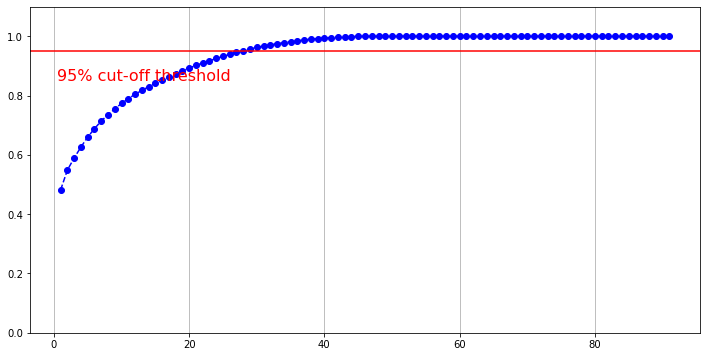

In [123]:
pca = PCA().fit(x_pca)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 92, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize = 16)

ax.grid(axis='x')
plt.show()

In [124]:
pca = PCA(n_components = 28)
pca.fit(x_train)

PCA(n_components=28)

In [125]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [130]:
logreg2 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.4, n_jobs = 2)
logreg2.fit(x_train_pca,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.4, multi_class='multinomial', n_jobs=2,
                   penalty='elasticnet', solver='saga')

In [131]:
y_pred = logreg2.predict(x_test_pca)


acc2 = accuracy_score(y_test,y_pred)

print(acc2)

0.22023968042609854


In [129]:

logreg3 = LogisticRegression(penalty = 'elasticnet', solver = 'saga', multi_class = 'multinomial', l1_ratio = 0.9, n_jobs = 2)
logreg3.fit(x_train_pca,y_train)

y_pred = logreg3.predict(x_test_pca)


acc3 = accuracy_score(y_test,y_pred)

print(acc3)

0.22017310252996006


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
